In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
x0 = np.array([[9],[1]])
print('x shape:',x0.shape)

x shape: (2, 1)


In [3]:
def t(x,a):
    x1 = float(x[0])
    x2 = float(x[1])
    return (math.pow(x1,2) + (math.pow(a,2)*math.pow(x2,2)))/(math.pow(x1,2) + (math.pow(a,3)*math.pow(x2,2)))

In [105]:
t(x0,10)

0.16743755781683625

In [5]:
def delta_x(x,a):
    x1 = float(x[0]) * -1
    x2 = float(x[1]) * -1 * a
    return np.array([[x1],[x2]])

In [6]:
delta_x(x0,2)

array([[-9.],
       [-2.]])

In [7]:
x_next = x0 + (t(x0,2)*delta_x(x0,2))
x_next

array([[ 0.40449438],
       [-0.91011236]])

In [8]:
def f(x,a):
    x1 = float(x[0])
    x2 = float(x[1])
    return 1/2 * (math.pow(x1, 2) + (a * math.pow(x2, 2)))

In [14]:
def steepest_descent(x0,a,k=200):
    x_hist = [x0]
    x_next = x0
    for i in range(k):
        x_next = x_next + (t(x_next,a)*delta_x(x_next,a))
        x_hist.append(x_next)
    return x_hist,[f(x,a) for x in x_hist]

In [103]:
# initial
k = 3     #197
a = 10      #10
x_hist, f_hist = steepest_descent(x0, a, k)

print(min(f_hist))

13.499579819864133


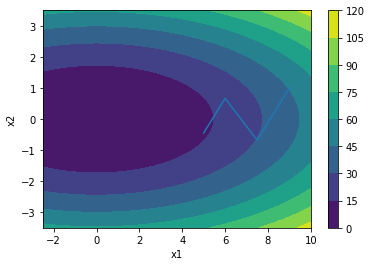

In [104]:
x1_plot = [float(x[0]) for x in x_hist]
x2_plot = [float(x[1]) for x in x_hist]

xlist = np.linspace(-2.5, 10.0, 100)
ylist = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = 1/2 * (X**2 + (a * Y**2))
fig, ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.plot(x1_plot, x2_plot)
plt.show()